### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
# Investigate the number of duplicates
num_duplicates = data.shape[0] - data.drop_duplicates().shape[0]
print("Number of entries:", data.shape[0], "\nNumber of duplicates:", num_duplicates, "\n")

# Investigate missing counts
missing_counts = data.isnull().sum().sort_values()
print(missing_counts)

Number of entries: 12684 
Number of duplicates: 74 

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
# car column is useless and does not provide additional value for our analysis
data = data.drop(columns=['car'])

# Bar, CarryAway, RestaurantLessThan20, Restaurant20To50, CoffeeHouse are visits per month.
# It could be difficult to answer these questions and also difficult to guess any valid number for these columns when null.
# Since it is only small portion of the dataset I have decided to remove these entries.
data = data.dropna(subset=['Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', 'CoffeeHouse'])

# Drop duplicates
data = data.drop_duplicates()

# remove dollar signs from income column
data['income'] = data['income'].str.replace('$', '')

4. What proportion of the total observations chose to accept the coupon?



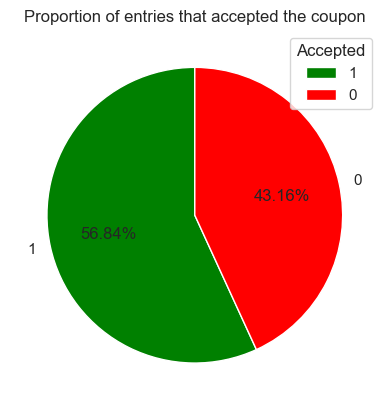

Number of entries: 12007
Number of entries that accepted the coupon: 6825 

Proportion of entries that accepted the coupon: 56.84 %


In [13]:
num_entries = data.shape[0]
num_accepted = data[data["Y"] == 1].shape[0]
prop_accepted = (num_accepted / num_entries) * 100

# Count occurrences of 1s and 0s in column 'Y'
counts = data['Y'].value_counts()
counts = counts.reindex([1, 0])  # Reorder so 1 comes first

# Plot pie chart
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon")
plt.legend(title="Accepted")
plt.show()

print("Number of entries:", num_entries)
print("Number of entries that accepted the coupon:", num_accepted, "\n")
print("Proportion of entries that accepted the coupon:", "{:.2f}".format(prop_accepted), "%")

5. Use a bar plot to visualize the `coupon` column.

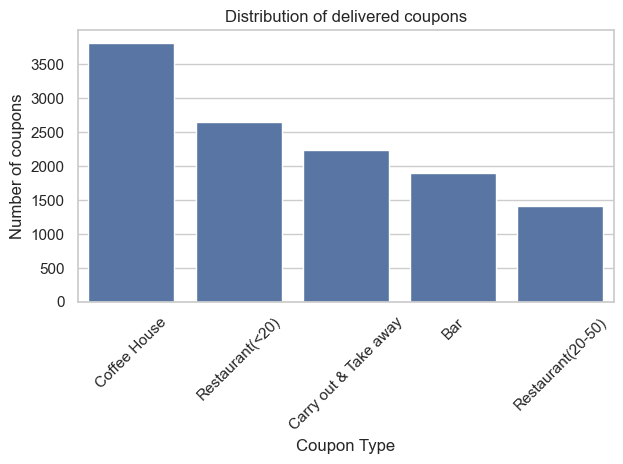

In [15]:
# Count occurrences of each category
coupon_counts = data['coupon'].value_counts()

sns.barplot(data = coupon_counts)
plt.title("Distribution of delivered coupons")
plt.ylabel("Number of coupons")
plt.xlabel("Coupon Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

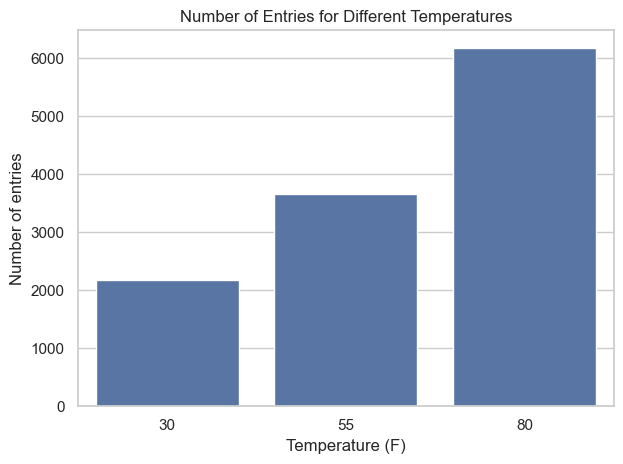

In [17]:
sns.countplot(data = data, x='temperature')
plt.title("Number of Entries for Different Temperatures")
plt.ylabel("Number of entries")
plt.xlabel("Temperature (F)")
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
data_bar = data[data['coupon'] == 'Bar']
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


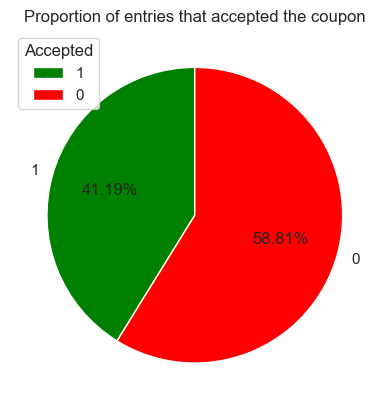

Number of entries (bar only): 1906
Number of entries (bar only) that accepted the coupon: 785 

Proportion of entries (bar only) that accepted the coupon: 41.19 %


In [21]:
num_entries_baronly = data_bar.shape[0]
num_accepted_baronly = data_bar[data_bar["Y"] == 1].shape[0]
prop_accepted_baronly = (num_accepted_baronly / num_entries_baronly) * 100

counts = data_bar['Y'].value_counts()
counts = counts.reindex([1, 0])

sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon")
plt.legend(title="Accepted")
plt.show()

print("Number of entries (bar only):", num_entries_baronly)
print("Number of entries (bar only) that accepted the coupon:", num_accepted_baronly, "\n")
print("Proportion of entries (bar only) that accepted the coupon:", "{:.2f}".format(prop_accepted_baronly), "%")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


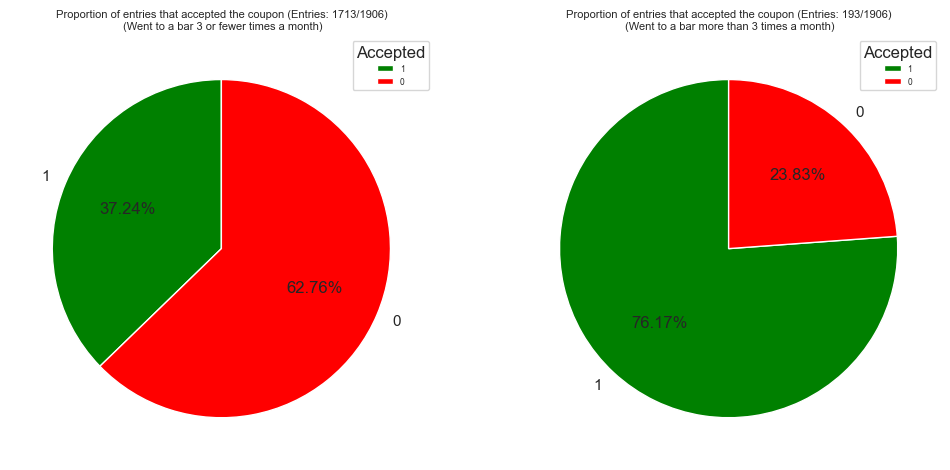

In [23]:
# Take entries that went to a bar 3 or fewer times a month
count_3_or_less = data_bar[data_bar['Bar'].isin(['never', 'less1', '1~3'])]
num_entries_3_or_less = count_3_or_less.shape[0]

# Take entries that went to a bar more than 3 times a month
count_more_than_3 = data_bar[data_bar['Bar'].isin(['4~8', 'gt8'])]
num_entries_more_than_3 = count_more_than_3.shape[0]

counts = count_3_or_less['Y'].value_counts()
counts = counts.reindex([1, 0])  # Reorder so 1 comes first

plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n (Went to a bar 3 or fewer times a month)".format(num_entries_3_or_less, num_entries_baronly), fontsize=8)
plt.legend(title="Accepted", fontsize=6)

counts = count_more_than_3['Y'].value_counts()
counts = counts.reindex([1, 0])  # Reorder so 1 comes first

plt.subplot(1,2,2)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n (Went to a bar more than 3 times a month)".format(num_entries_more_than_3, num_entries_baronly), fontsize=8)
plt.legend(title="Accepted", fontsize=6)
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


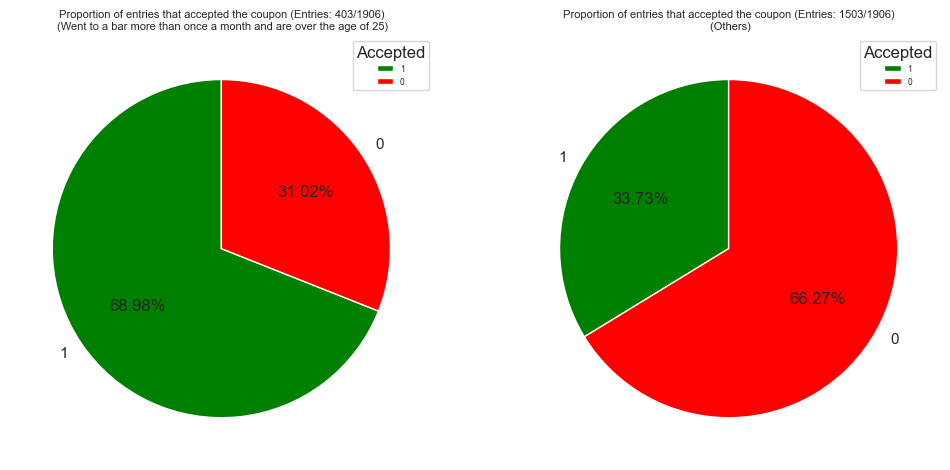

In [25]:
data_bar_4 = data_bar[(data_bar['age'].isin(['26', '31', '36', '41', '46', '50plus'])) &
                                  (data_bar['Bar'].isin(['1~3', '4~8', 'gt8']))]
num_entries_4 = data_bar_4.shape[0]

all_others_4 = data_bar.merge(data_bar_4[['age', 'Bar']], on=['age', 'Bar'], how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
num_entries_all_others_4 = all_others_4.shape[0]

counts = data_bar_4['Y'].value_counts()
counts = counts.reindex([1, 0])

plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n (Went to a bar more than once a month and are over the age of 25)".format(num_entries_4, num_entries_baronly), fontsize=8)
plt.legend(title="Accepted", fontsize=6)

counts = all_others_4['Y'].value_counts()
counts = counts.reindex([1, 0])  # Reorder so 1 comes first

plt.subplot(1,2,2)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n (Others)".format(num_entries_all_others_4, num_entries_baronly), fontsize=8)
plt.legend(title="Accepted", fontsize=6)
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


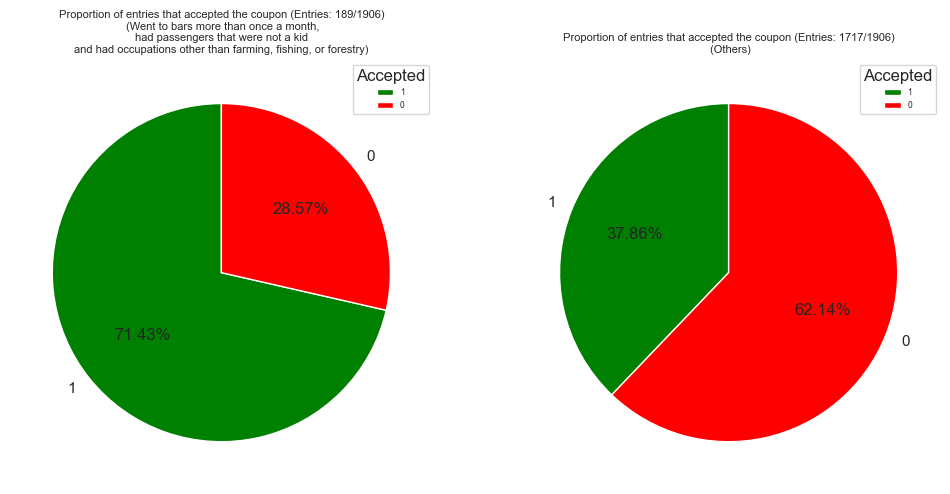

In [27]:
data_bar_5 = data_bar[(data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                       ~(data_bar['passanger'].isin(['Kid(s)', 'Alone'])) &
                       ~(data_bar['occupation'].isin(['Farming Fishing & Forestry']))]
num_entries_5 = data_bar_5.shape[0]

all_others_5 = data_bar.merge(data_bar_5[['Bar', 'passanger', 'occupation']], on=['Bar', 'passanger', 'occupation'], how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
num_entries_all_others_5 = all_others_5.shape[0]

counts = data_bar_5['Y'].value_counts()
counts = counts.reindex([1, 0])

plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n (Went to bars more than once a month,\nhad passengers that were not a kid\nand had occupations other than farming, fishing, or forestry)".format(num_entries_5, num_entries_baronly), fontsize=8)
plt.legend(title="Accepted", fontsize=6)

counts = all_others_5['Y'].value_counts()
counts = counts.reindex([1, 0])

plt.subplot(1,2,2)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n (Others)".format(num_entries_all_others_5, num_entries_baronly), fontsize=8)
plt.legend(title="Accepted", fontsize=6)
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



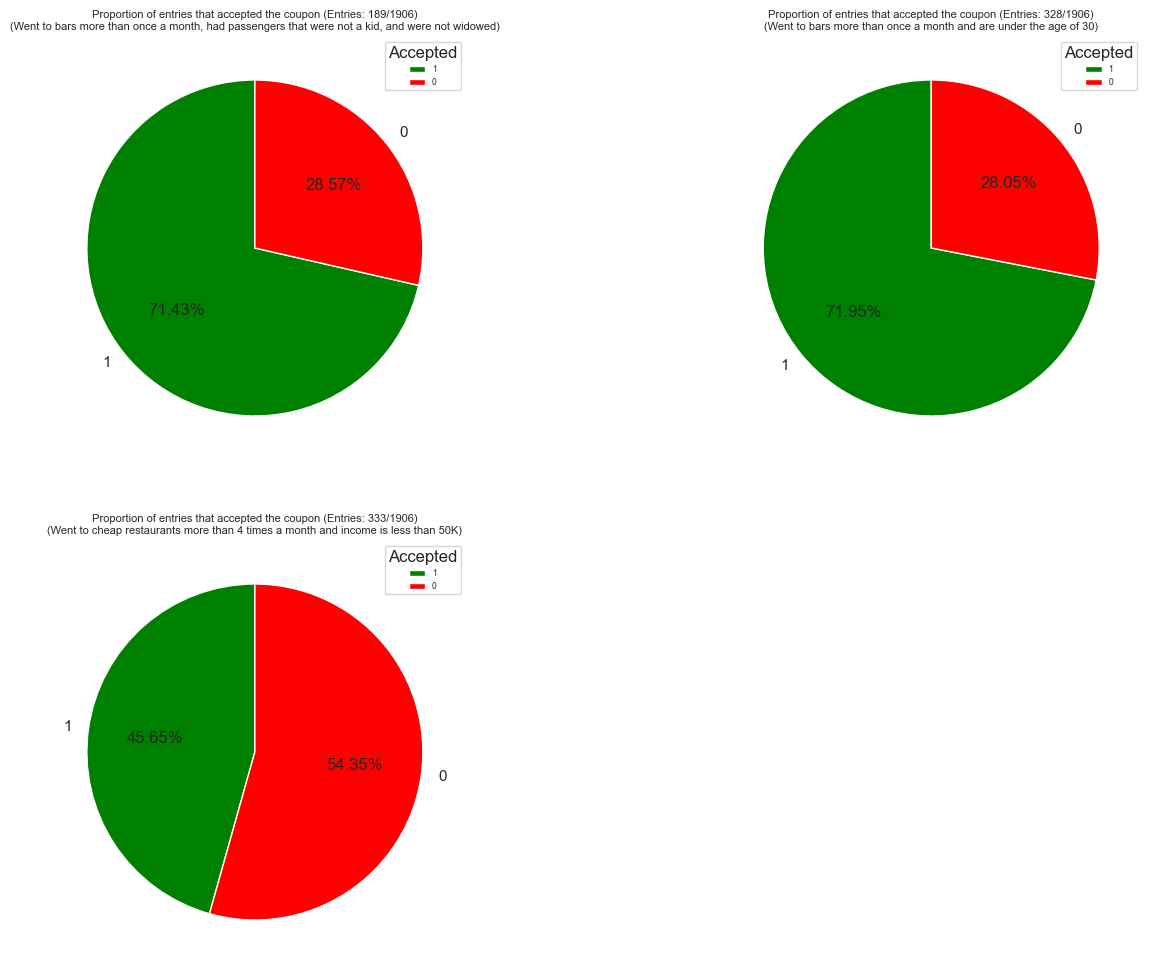

In [29]:
data_bar_6_1 = data_bar[(data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                       ~(data_bar['passanger'].isin(['Kid(s)', 'Alone'])) &
                       ~(data_bar['maritalStatus'].isin(['Widowed']))]
data_bar_6_2 = data_bar[(data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                        (data_bar['age'].isin(['below21', '21', '26']))]
data_bar_6_3 = data_bar[(data_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
                        (data_bar['income'].isin(['37500 - 49999', '25000 - 37499', '12500 - 24999', 'Less than 12500']))]
num_entries_6_1 = data_bar_6_1.shape[0]
num_entries_6_2 = data_bar_6_2.shape[0]
num_entries_6_3 = data_bar_6_3.shape[0]

counts = data_bar_6_1['Y'].value_counts()
counts = counts.reindex([1, 0])

plt.figure(figsize=(16, 12))

plt.subplot(2,2,1)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n(Went to bars more than once a month, had passengers that were not a kid, and were not widowed)".format(num_entries_6_1, num_entries_baronly), fontsize=8)
plt.legend(title="Accepted", fontsize=6)

counts = data_bar_6_2['Y'].value_counts()
counts = counts.reindex([1, 0])

plt.subplot(2,2,2)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n(Went to bars more than once a month and are under the age of 30)".format(num_entries_6_2, num_entries_baronly), fontsize=8)
plt.legend(title="Accepted", fontsize=6)

counts = data_bar_6_3['Y'].value_counts()
counts = counts.reindex([1, 0])

plt.subplot(2,2,3)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n(Went to cheap restaurants more than 4 times a month and income is less than 50K)".format(num_entries_6_3, num_entries_baronly), fontsize=8)

plt.legend(title="Accepted", fontsize=6)
plt.show()

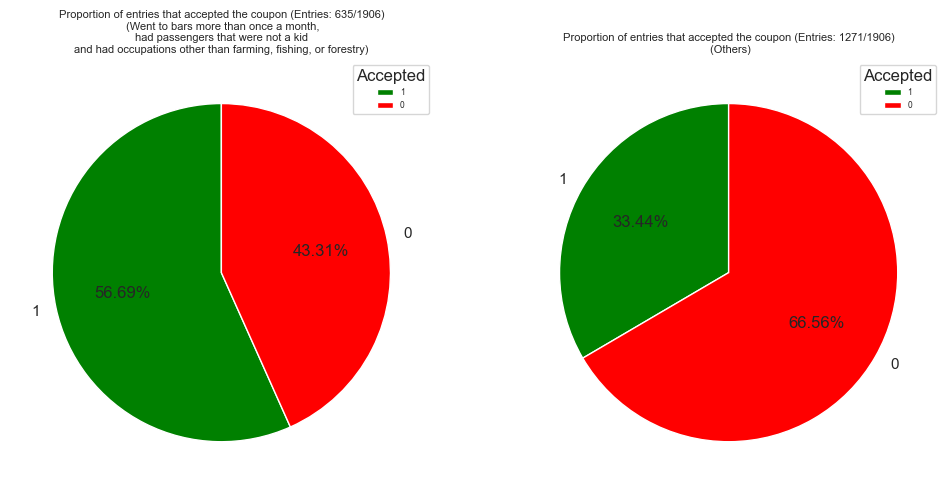

In [30]:
data_bar_6 = data_bar[((data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                      ~(data_bar['passanger'].isin(['Kid(s)', 'Alone'])) &
                      ~(data_bar['maritalStatus'].isin(['Widowed']))) |
                      ((data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                       (data_bar['age'].isin(['below21', '21', '26']))) |
                      ((data_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
                       (data_bar['income'].isin(['37500 - 49999', '25000 - 37499', '12500 - 24999', 'Less than 12500'])))]
num_entries_6 = data_bar_6.shape[0]

all_others_6 = data_bar.merge(data_bar_6[['Bar', 'passanger', 'maritalStatus', 'age', 'RestaurantLessThan20', 'income']], on=['Bar', 'passanger', 'maritalStatus', 'age', 'RestaurantLessThan20', 'income'], how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
num_entries_all_others_6 = all_others_6.shape[0]

counts = data_bar_6['Y'].value_counts()
counts = counts.reindex([1, 0])

plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n (Went to bars more than once a month,\nhad passengers that were not a kid\nand had occupations other than farming, fishing, or forestry)".format(num_entries_6, num_entries_baronly), fontsize=8)
plt.legend(title="Accepted", fontsize=6)

counts = all_others_6['Y'].value_counts()
counts = counts.reindex([1, 0])

plt.subplot(1,2,2)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n (Others)".format(num_entries_all_others_6, num_entries_baronly), fontsize=8)
plt.legend(title="Accepted", fontsize=6)
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

##### I have the following findings: 
Overall, 41.19% (785 out of 1906) accepted the coupon.<br>
Drivers who go to bars more than 3 times a month seem to accept the coupon at a very high rate of 76.17%.<br>
Drivers who go to bars more than once a month and are slightly older (25 years and older) accept the coupon easier at rate of 68.98%<br>
On the other hand, drivers that go to bars more than once a month and are younger than 30 years accept the coupon higher rate of 71.95%<br>
Also, drivers who go to bars more than once a month and who are driving with other people (not kids) tend to take the offer at a rate of 71.43%. Which is a high response rate.<br><br>
A negative note is that people that earn less and go to cheap restaurants do not accept the coupon. This could be because of the high price range. <br><br>

##### Recommendations:
Target low-income drivers with lower-end options. Target people who typically go to the bars as a priority. Even going to a bar a few times a month increases the potential significantly.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [34]:
data_cof = data[data['coupon'] == 'Coffee House']
data_cof.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


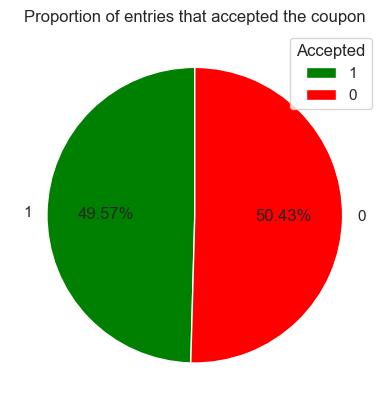

Number of entries (coffee house only): 3809
Number of entries (coffee house only) that accepted the coupon: 1888 

Proportion of entries (coffee house only) that accepted the coupon: 49.57 %


In [61]:
num_entries_cof = data_cof.shape[0]
num_accepted_cof = data_cof[data_cof["Y"] == 1].shape[0]
prop_accepted_cof = (num_accepted_cof / num_entries_cof) * 100

counts = data_cof['Y'].value_counts()
counts = counts.reindex([1, 0])

sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon")
plt.legend(title="Accepted")
plt.show()

print("Number of entries (coffee house only):", num_entries_cof)
print("Number of entries (coffee house only) that accepted the coupon:", num_accepted_cof, "\n")
print("Proportion of entries (coffee house only) that accepted the coupon:", "{:.2f}".format(prop_accepted_cof), "%")

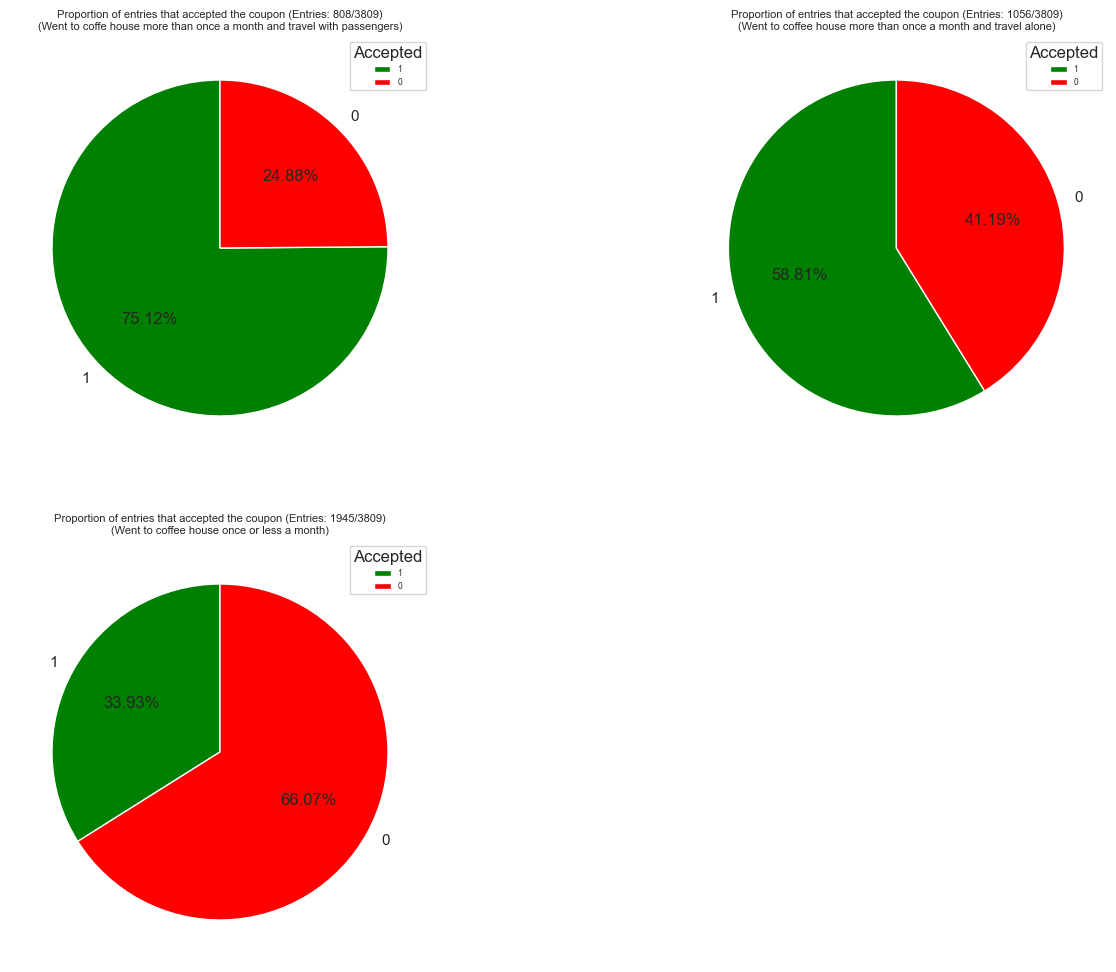

In [36]:
data_cof_1_1 = data_cof[(data_cof['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) &
                       ~(data_cof['passanger'].isin(['Alone']))]
data_cof_1_2 = data_cof[(data_cof['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) &
                        (data_cof['passanger'].isin(['Alone']))]
data_cof_1_3 = data_cof[(data_cof['CoffeeHouse'].isin(['never', 'less1']))]

num_entries_6_1 = data_cof_1_1.shape[0]
num_entries_6_2 = data_cof_1_2.shape[0]
num_entries_6_3 = data_cof_1_3.shape[0]

counts = data_cof_1_1['Y'].value_counts()
counts = counts.reindex([1, 0])

plt.figure(figsize=(16, 12))

plt.subplot(2,2,1)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n(Went to coffe house more than once a month and travel with passengers)".format(num_entries_6_1, num_entries_cof), fontsize=8)
plt.legend(title="Accepted", fontsize=6)

counts = data_cof_1_2['Y'].value_counts()
counts = counts.reindex([1, 0])

plt.subplot(2,2,2)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n(Went to coffee house more than once a month and travel alone)".format(num_entries_6_2, num_entries_cof), fontsize=8)
plt.legend(title="Accepted", fontsize=6)

counts = data_cof_1_3['Y'].value_counts()
counts = counts.reindex([1, 0])

plt.subplot(2,2,3)
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['Green', 'Red'])
plt.title("Proportion of entries that accepted the coupon (Entries: {}/{})\n(Went to coffee house once or less a month)".format(num_entries_6_3, num_entries_cof), fontsize=8)

plt.legend(title="Accepted", fontsize=6)
plt.show()

##### I have the following findings: 
Overall, 49.57% (1888 out of 3809) accepted the coupon.<br>

Drivers who go to coffee shops more than once a month and are travelling with passengers seem to accept the coupon at a very high rate of 75.12%.<br>
Drivers who go to coffee shops more than once a month and are travelling alone seem to have a much lower response rate of 58.81%.<br>
Drivers who do not go to coffee shops often (once or less per month) have a very low response rate of 33.93%. <br>

##### Recommendations:
There is potential to attract drivers that are coffee shop visitors but are driving alone. <br>
Drivers who do not go to coffee shops often have a much lower response ratio, but they still respond. There could be ways to improve their rate. Maybe more targeted campaigns for those who do not visit coffee houses often.
